# PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\mcent\miniconda3\envs\retail\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/mcent/OneDrive/Escritorio/MARTIN/MASTERS/DS4B/DATA SCIENCE/03_MACHINE_LEARNING/07_CASOS/FORECASTING RETAIL'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,ventas_maxm_6,ventas_maxm_7,ventas_maxm_8,ventas_maxm_9,ventas_maxm_10,ventas_maxm_11,ventas_maxm_12,ventas_maxm_13,ventas_maxm_14,ventas_maxm_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [5]:
target = 'ventas'
x = df.drop(columns = ['date','store_id','item_id','ventas']).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [6]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

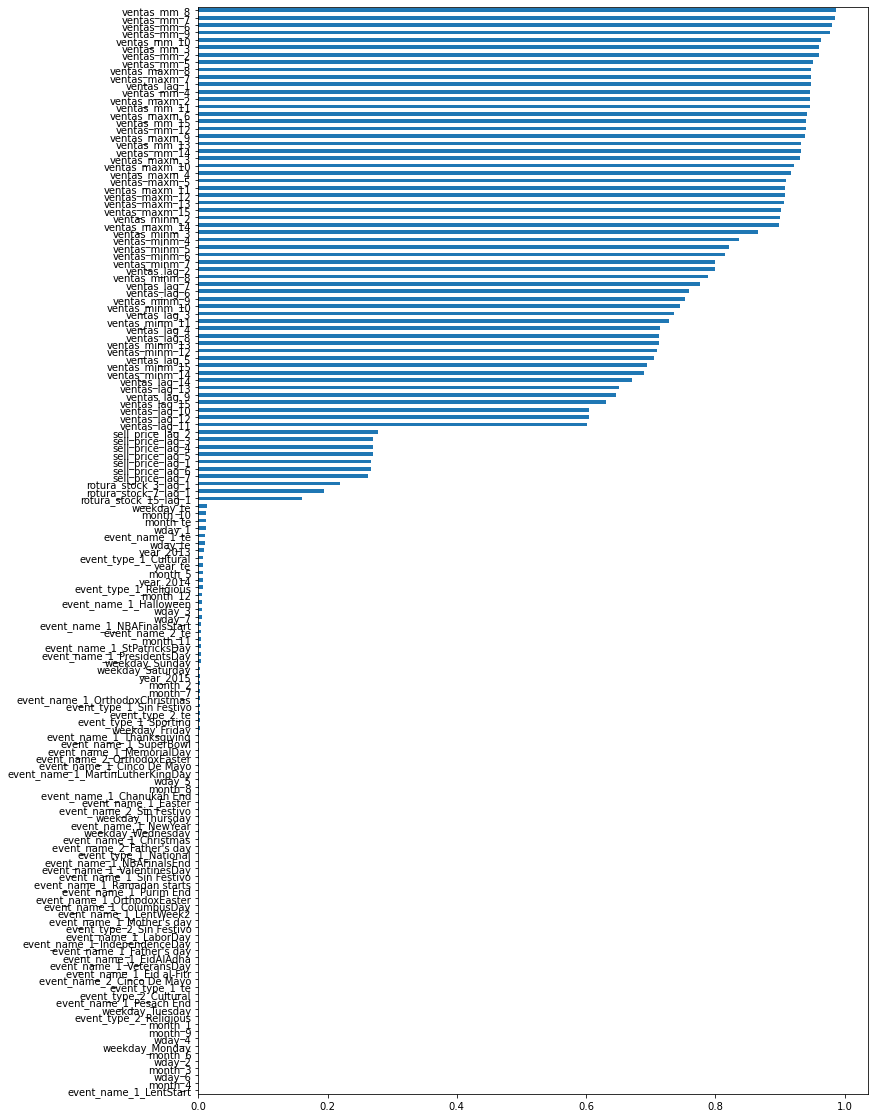

In [7]:
mutual_selector = mutual_info_regression(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

Miramos la posición del year2015.

In [8]:
ranking_mi(mutual_selector).reset_index().iloc[70:100]

,index,variable,importancia_mi,ranking_mi
70,15,wday_1,0.011487,70
71,76,event_name_1_te,0.010590,71
72,74,wday_te,0.010414,72
73,0,year_2013,0.008274,73
74,60,event_type_1_Cultural,0.007984,74
75,72,year_te,0.007973,75
76,7,month_5,0.007502,76
77,1,year_2014,0.007287,77
78,62,event_type_1_Religious,0.006996,78
79,14,month_12,0.006344,79


In [29]:
posicion_variable_limite = 90

##### Extraer los nombres de las que entran

In [30]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [31]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [32]:
rfe = RFE(estimator = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae'))

#### Entrenar

In [13]:
rfe.fit(x,y)

RFE(estimator=XGBRegressor(base_score=None, booster=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, enable_categorical=False,
                           eval_metric='mae', gamma=None, gpu_id=None,
                           importance_type=None, interaction_constraints=None,
                           learning_rate=None, max_delta_step=None,
                           max_depth=None, min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=-1, num_parallel_tree=None, predictor=None,
                           random_state=None, reg_alpha=None, reg_lambda=None,
                           scale_pos_weight=None, subsample=None,
                           tree_method=None, use_label_encoder=False,
                           validate_parameters=None, verbosity=None))

##### Extraer los nombres de las que entran

In [14]:
entran_rfe = x.columns[rfe.support_]
entran_rfe

Index(['year_2013', 'month_2', 'month_3', 'month_8', 'month_11', 'month_12',
       'wday_1', 'wday_2', 'wday_4', 'wday_5', 'event_name_1_Christmas',
       'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
       'event_name_1_VeteransDay', 'wday_te', 'sell_price_lag_1',
       'sell_price_lag_2', 'sell_price_lag_4', 'sell_price_lag_5',
       'sell_price_lag_6', 'sell_price_lag_7', 'rotura_stock_3_lag_1',
       'ventas_lag_1', 'ventas_lag_2', 'ventas_lag_3', 'ventas_lag_5',
       'ventas_lag_6', 'ventas_lag_7', 'ventas_lag_8', 'ventas_lag_9',
       'ventas_lag_10', 'ventas_lag_11', 'ventas_lag_12', 'ventas_lag_13',
       'ventas_lag_14', 'ventas_lag_15', 'ventas_minm_2', 'ventas_minm_3',
       'ventas_minm_4', 'ventas_minm_5', 'ventas_minm_6', 'ventas_minm_7',
       'ventas_minm_10', 'ventas_minm_11', 'ventas_minm_14', 'ventas_minm_15',
       'ventas_mm_2', 'ventas_mm_3', 'ventas_mm_4', 'ventas_mm_5',
       'ventas_mm_6', 'ventas_mm_7', 'ventas_mm_8', 'ventas_mm_9',
    

#### Crear el dataframe con la selección

In [15]:
x_rfe = x[entran_rfe].copy()

In [16]:
x_rfe

,year_2013,month_2,month_3,month_8,month_11,month_12,wday_1,wday_2,wday_4,wday_5,...,ventas_maxm_5,ventas_maxm_6,ventas_maxm_7,ventas_maxm_8,ventas_maxm_9,ventas_maxm_10,ventas_maxm_11,ventas_maxm_13,ventas_maxm_14,ventas_maxm_15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,224.0,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0
20976,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


### Permutation Importance

#### Crear una función para mostrar el resultado

In [17]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [18]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBRegressor(use_label_encoder=False, n_jobs = -1, eval_metric='mae')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'neg_mean_absolute_percentage_error',
                                     n_repeats=3, n_jobs = -1)

C:\Users\mcent\miniconda3\envs\retail\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Revisar la salida

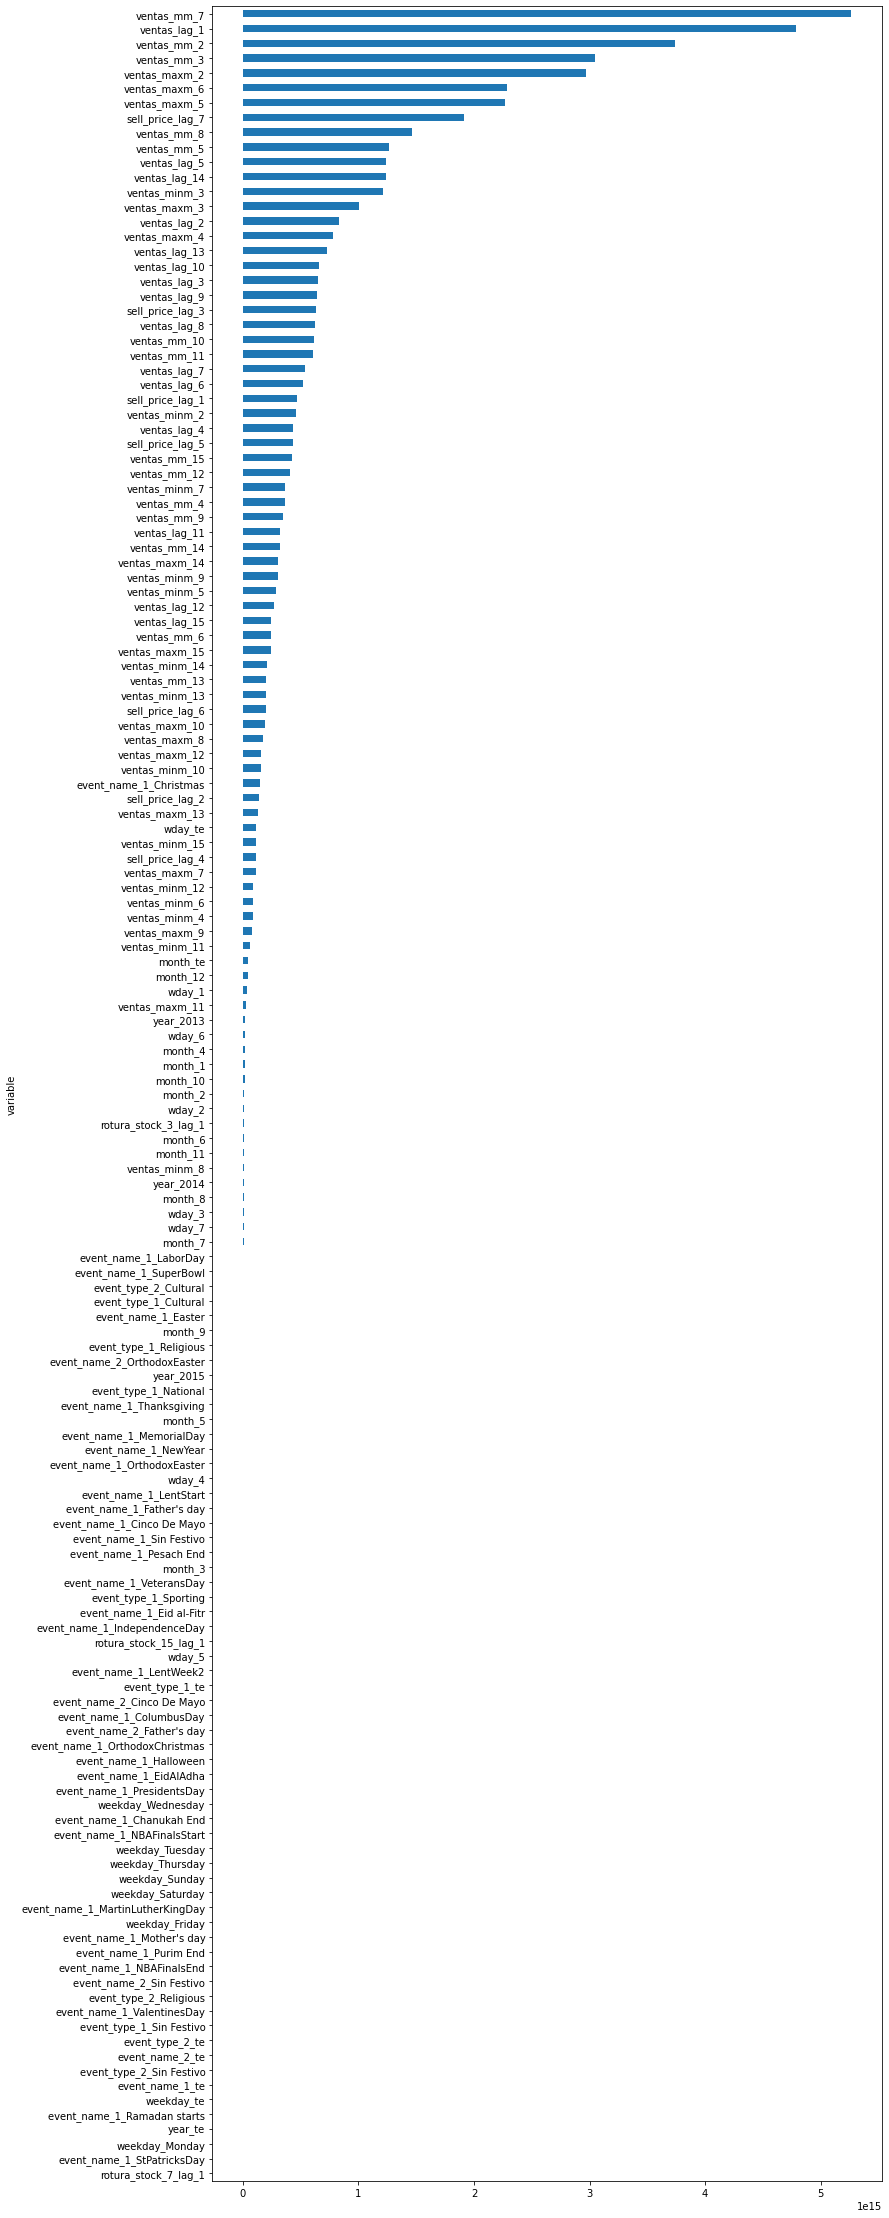

In [19]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,40));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

Revisar la posición de wday3.

In [20]:
rank_per.reset_index().iloc[50:80]

,index,variable,importancia_per,ranking_per
50,143,ventas_maxm_12,1.600326e+14,50
51,113,ventas_minm_10,1.554424e+14,51
52,30,event_name_1_Christmas,1.518149e+14,52
53,81,sell_price_lag_2,1.414123e+14,53
54,144,ventas_maxm_13,1.348055e+14,54
55,74,wday_te,1.177440e+14,55
56,118,ventas_minm_15,1.158692e+14,56
57,83,sell_price_lag_4,1.123738e+14,57
58,138,ventas_maxm_7,1.115492e+14,58
59,115,ventas_minm_12,9.107402e+13,59


In [21]:
posicion_variable_limite = 77

##### Extraer los nombres de las que entran

In [22]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [23]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

In [24]:
x_preseleccionado = x_mi
#x_preseleccionado = x_rfe
#x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

En este caso no hacemos, ya que ya son muchas variables y vamos a modelizar con algoritmos de árboles.

## INCORPORACION DE VARIABLES DE SEGMENTACION

Vamos a añadir las variables de segmentación que también necesitaremos.

In [25]:
x_preseleccionado = pd.concat([df[['date','store_id','item_id']], x_preseleccionado], axis=1)

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [26]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [27]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [28]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)